In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
home = os.getcwd().split('AUT-CNN-TUB')[0]
canon_path  = os.path.join(home,'AUT-CNN-TUB/Data/27072018/27072018_canon/AllParts')
industy_path  = os.path.join(home,'AUT-CNN-TUB/Data/27072018/27072018_industry/AllParts')

In [3]:
len(os.listdir(os.path.join(home,industy_path)))

1126

In [4]:
img_name = os.listdir(os.path.join(home,industy_path))[881]
file_path = os.path.join(home,industy_path, img_name)
image = cv2.imread(file_path)

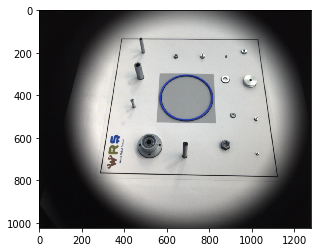

In [5]:
plt.imshow(image)
plt.show()

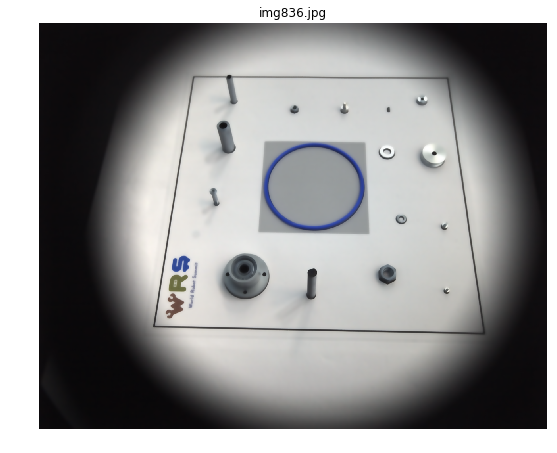

In [6]:
blurred = cv2.bilateralFilter(image,10, 100, 100)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(blurred)
plt.show()

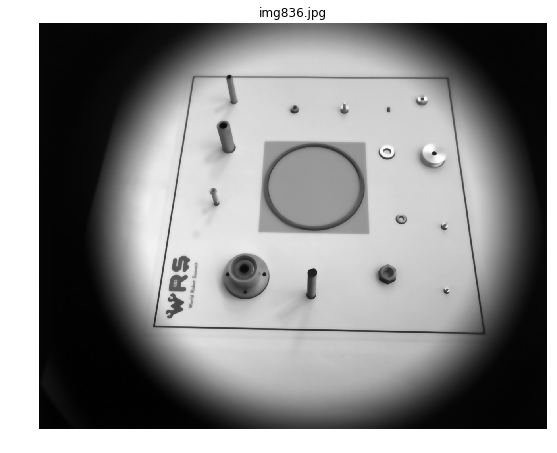

In [7]:
imgray = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(imgray, cmap='gray');#
plt.show()

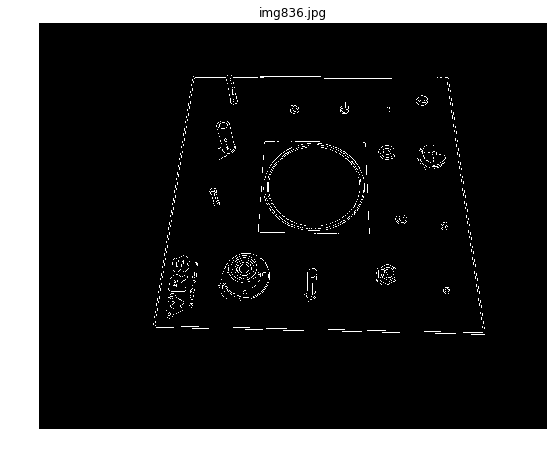

In [8]:
thresh = cv2.Canny(blurred,50,10)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(thresh, cmap='gray');
plt.show()

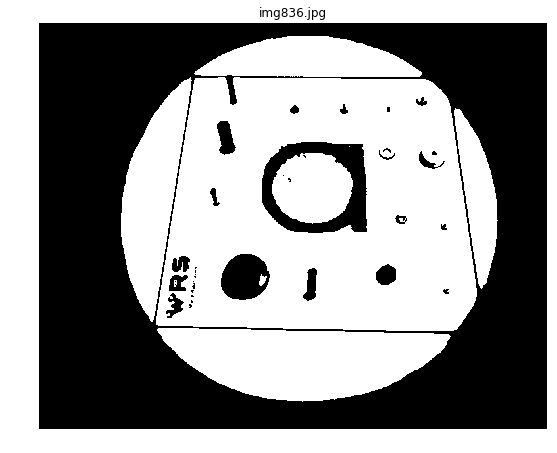

In [9]:
ret,thresh = cv2.threshold(blurred[:,:,0],149,255,0)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(thresh, cmap='gray');
plt.show()

In [18]:
sub_contour = []
_,contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    if len(c) < 300:
        if len(c) > 10:
            print(len(c))
            sub_contour.append(c)


19
11
135
17
29
25
68
14
60
89
101
173
40
34
41
31
63
12
96
56
30
292
22
12
16
106
14
34
34
52


In [19]:
img_name = os.listdir(os.path.join(home,industy_path))[881]
file_path = os.path.join(home,industy_path, img_name)
image = cv2.imread(file_path)
img = image

In [20]:
img = cv2.drawContours(image, sub_contour, -3, (255,255,255), 3)
for c in sub_contour:
    # compute the center of the contour
    M = cv2.moments(c)
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
    cv2.putText(image, "center", (cx - 20, cy - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

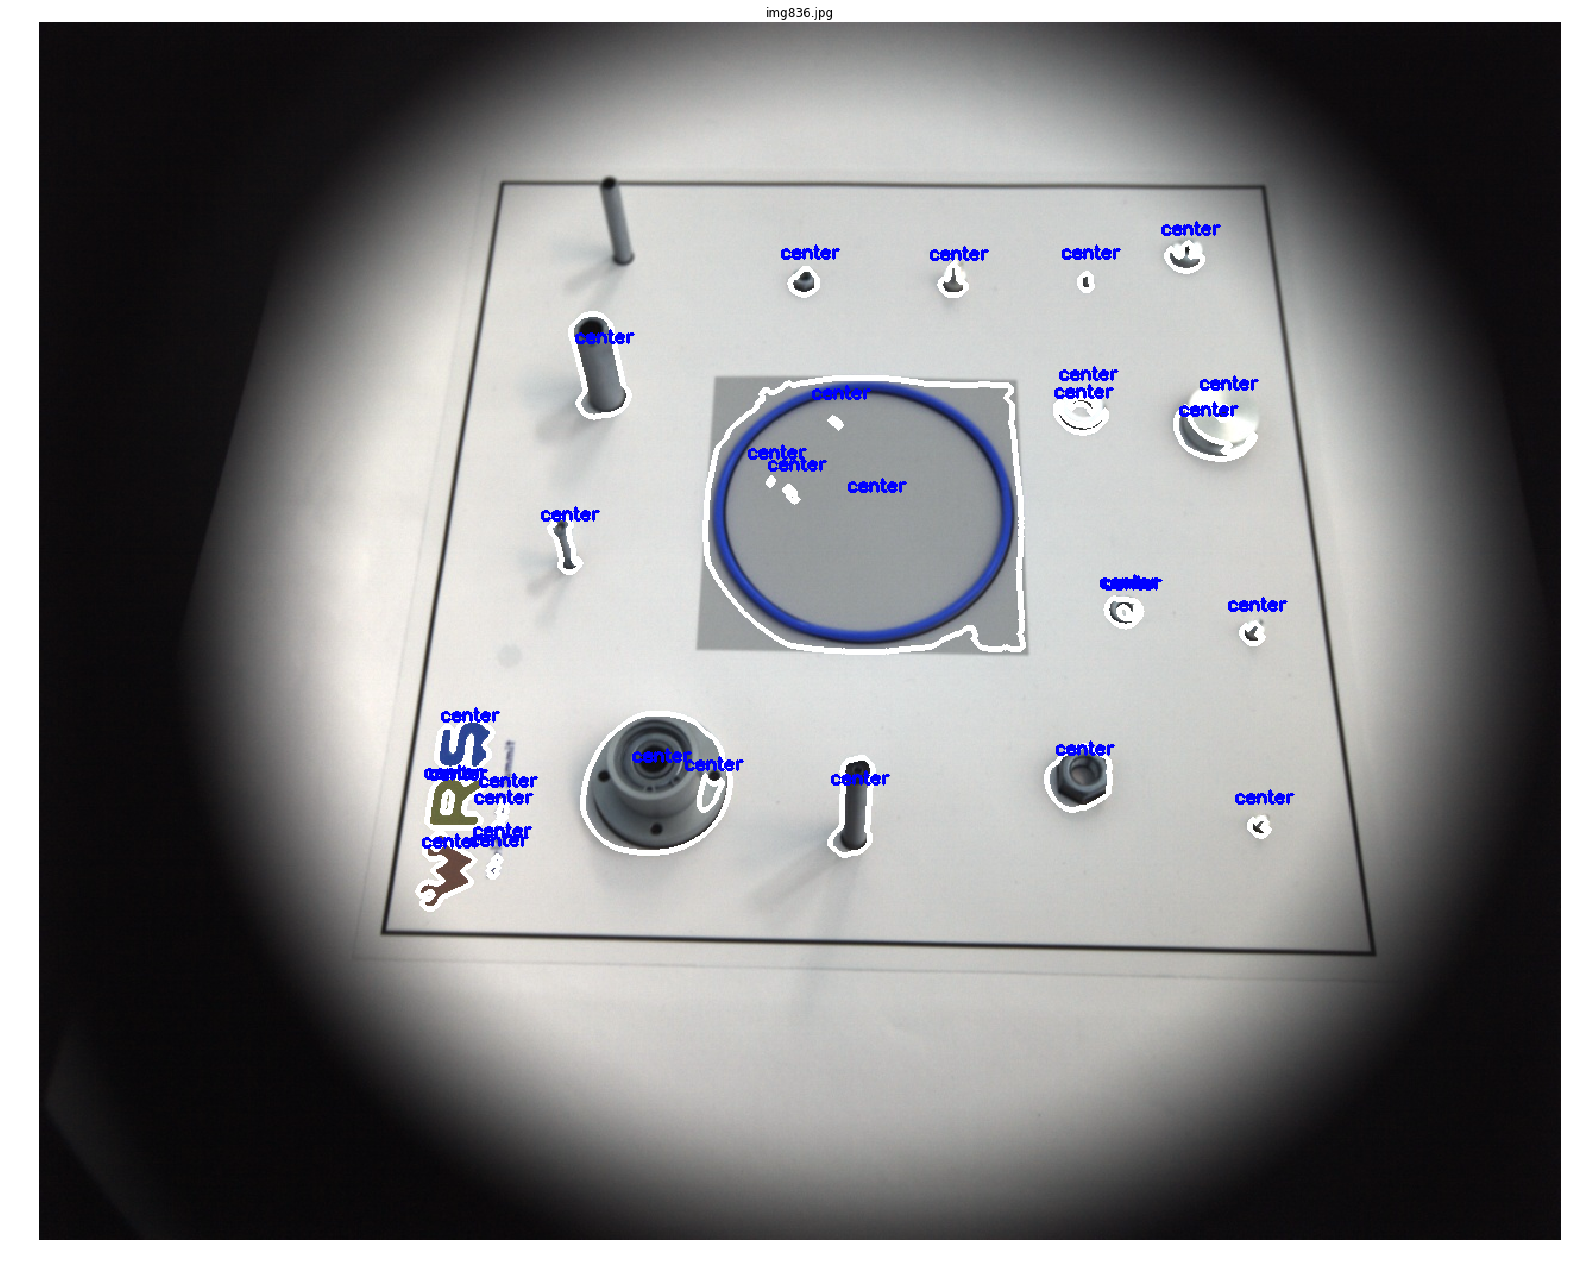

In [21]:
fig = plt.figure(figsize=(60,60))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(img, cmap='gray');